In [1]:
import os


if "original_dir" in globals():
    # current_dir = os.path.dirname(original_dir)
    current_dir = original_dir
    os.chdir(current_dir)
    print(f"Current directory: {current_dir}")
else:
    original_dir = os.getcwd()
    print(f"Current directory: {original_dir}")

os.chdir("../")
print(f"Changed directory: {os.getcwd()}")

Current directory: d:\northeastern\neu_dev\neumove_org\myoassist\docs
Changed directory: d:\northeastern\neu_dev\neumove_org\myoassist


In [2]:
import numpy as np
from myoassist_rl.rl_train.utils.data_types import DictionableDataclass
from myoassist_rl.rl_train.utils.environment_handler import EnvironmentHandler
from myoassist_rl.envs import myoassist_leg_imitation_exo
from myoassist_rl.rl_train.utils.data_types import DictionableDataclass
import matplotlib.pyplot as plt

MyoSuite:> Registering Myo Envs


In [3]:
# config = DictionableDataclass.create(myoassist_leg_imitation_exo.ExoImitationTrainSessionConfig, None)
config = EnvironmentHandler.get_session_config_from_path("myoassist_rl/rl_train/train_configs/imitation_tutorial_22_separated_net.json", myoassist_leg_imitation_exo.ExoImitationTrainSessionConfig)
config.env_params.env_id = "myoAssistLegImitationExo-v0"
config.env_params.safe_height = 0.0
config.env_params.out_of_trajectory_threshold = 0.3
# config.env_params.model_path = "myosuite/simhive/myoassist_sim/myoLeg26_TUTORIAL.xml"
# config.env_params.reference_data_path = "myoassist_rl/reference_data/short_reference_gait.npz"
config.env_params.num_envs = 1
# config.env_params.reference_data_keys = ["ankle_angle_l", "ankle_angle_r",
#                                 "hip_flexion_l", "hip_flexion_r",
#                                 "hip_adduction_l", "hip_adduction_r",
#                                 "hip_rotation_l", "hip_rotation_r",
#                                 "knee_angle_l", "knee_angle_r",
#                                 "pelvis_tilt", "pelvis_list", "pelvis_rotation",
#                                 "pelvis_tx", "pelvis_ty", "pelvis_tz"
#                                 ]
ref_data_dict = EnvironmentHandler.load_reference_data(config)

Loading config from myoassist_rl/rl_train/train_configs/imitation_tutorial_22_separated_net.json
Loading reference data from myoassist_rl/reference_data/short_reference_gait.npz


In [4]:
def reset_and_render(config):
    envw = EnvironmentHandler.create_environment(config, False)
    env:myoassist_leg_imitation_exo.MyoAssistLegImitationExo = envw.unwrapped
    env.reset(seed=0)
    # env.
    frame = env.sim.renderer.render_offscreen(camera_id=1,
                                                    width=1920//2,
                                                    height=1080//2)
    # Increase the DPI (dots per inch) for higher quality and set interpolation for better image quality
    plt.figure(figsize=(12, 6), dpi=300)  # Set a larger figure size and higher DPI
    plt.imshow(frame)  # Use high-quality interpolation
    plt.axis('off')  # Hide axes for a |cleaner image
    plt.tight_layout()  # Remove unnecessary padding
    plt.show()

Loading reference data from myoassist_rl/reference_data/short_reference_gait.npz
config.env_params.env_id='myoAssistLegImitationExo-v0'
=================environment seed: 1234=====================
=================environment model_path: models/22muscle_2D/myoLeg22_2D_TUTORIAL.xml=====================
    NeuMove MyoLegBase
    
===============================PARAMETERS=============================
self._reward_keys_and_weights=ImitationTrainSessionConfig.EnvParams.RewardWeights(forward_reward=0.2, muscle_activation_penalty=0.1, muscle_activation_diff_penalty=0.1, footstep_delta_time=0.0, average_velocity_per_step=0.0, muscle_activation_penalty_per_step=0.0, joint_constraint_force_penalty=0.0, foot_force_penalty=0.5, qpos_imitation_rewards={'pelvis_ty': 0.4, 'pelvis_tilt': 0.4, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'knee_angle_l': 0.2, 'knee_angle_r': 0.2, 'ankle_angle_l': 0.2, 'ankle_angle_r': 0.2}, qvel_imitation_rewards={'pelvis_ty': 0.4, 'pelvis_tilt': 0.4, 'hip_flexion_l': 0

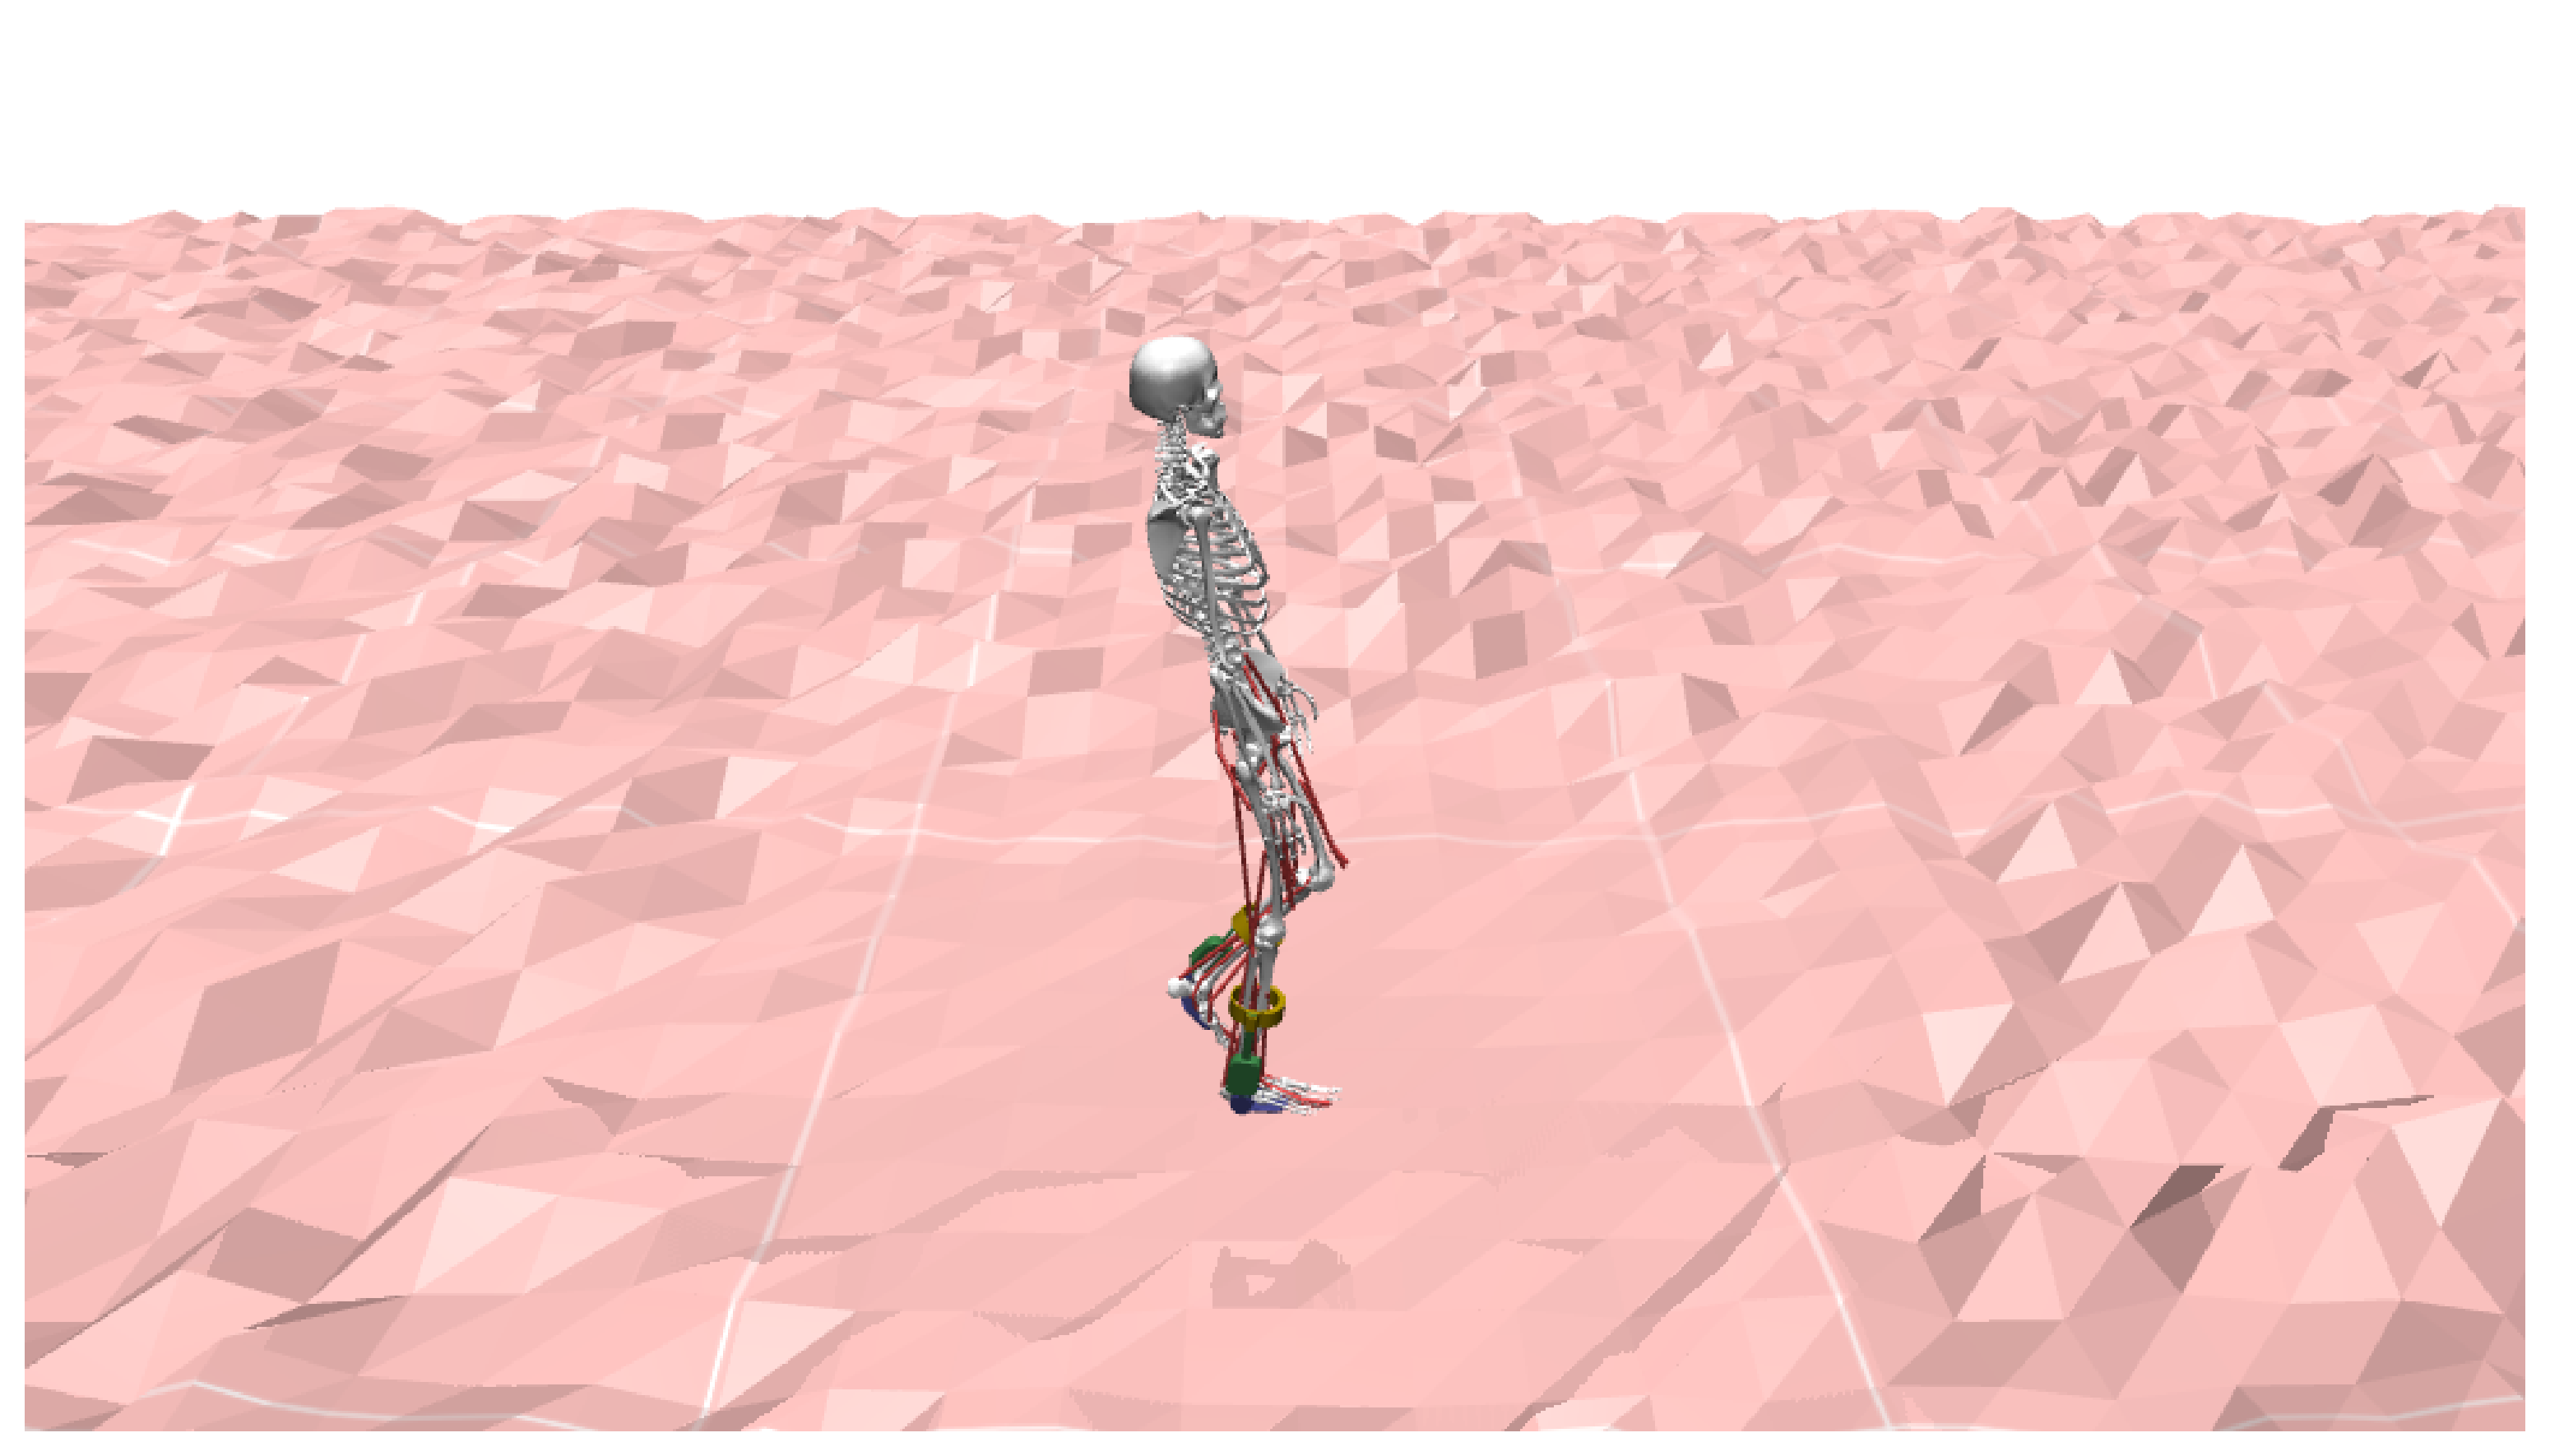

In [5]:
config.env_params.terrain_type = "random"
config.env_params.terrain_params = "0.2" #random scale(amplitude)
reset_and_render(config)

Loading reference data from myoassist_rl/reference_data/short_reference_gait.npz
config.env_params.env_id='myoAssistLegImitationExo-v0'
=================environment seed: 1234=====================
=================environment model_path: models/22muscle_2D/myoLeg22_2D_TUTORIAL.xml=====================
===============================PARAMETERS=============================
self._reward_keys_and_weights=ImitationTrainSessionConfig.EnvParams.RewardWeights(forward_reward=0.2, muscle_activation_penalty=0.1, muscle_activation_diff_penalty=0.1, footstep_delta_time=0.0, average_velocity_per_step=0.0, muscle_activation_penalty_per_step=0.0, joint_constraint_force_penalty=0.0, foot_force_penalty=0.5, qpos_imitation_rewards={'pelvis_ty': 0.4, 'pelvis_tilt': 0.4, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'knee_angle_l': 0.2, 'knee_angle_r': 0.2, 'ankle_angle_l': 0.2, 'ankle_angle_r': 0.2}, qvel_imitation_rewards={'pelvis_ty': 0.4, 'pelvis_tilt': 0.4, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'k

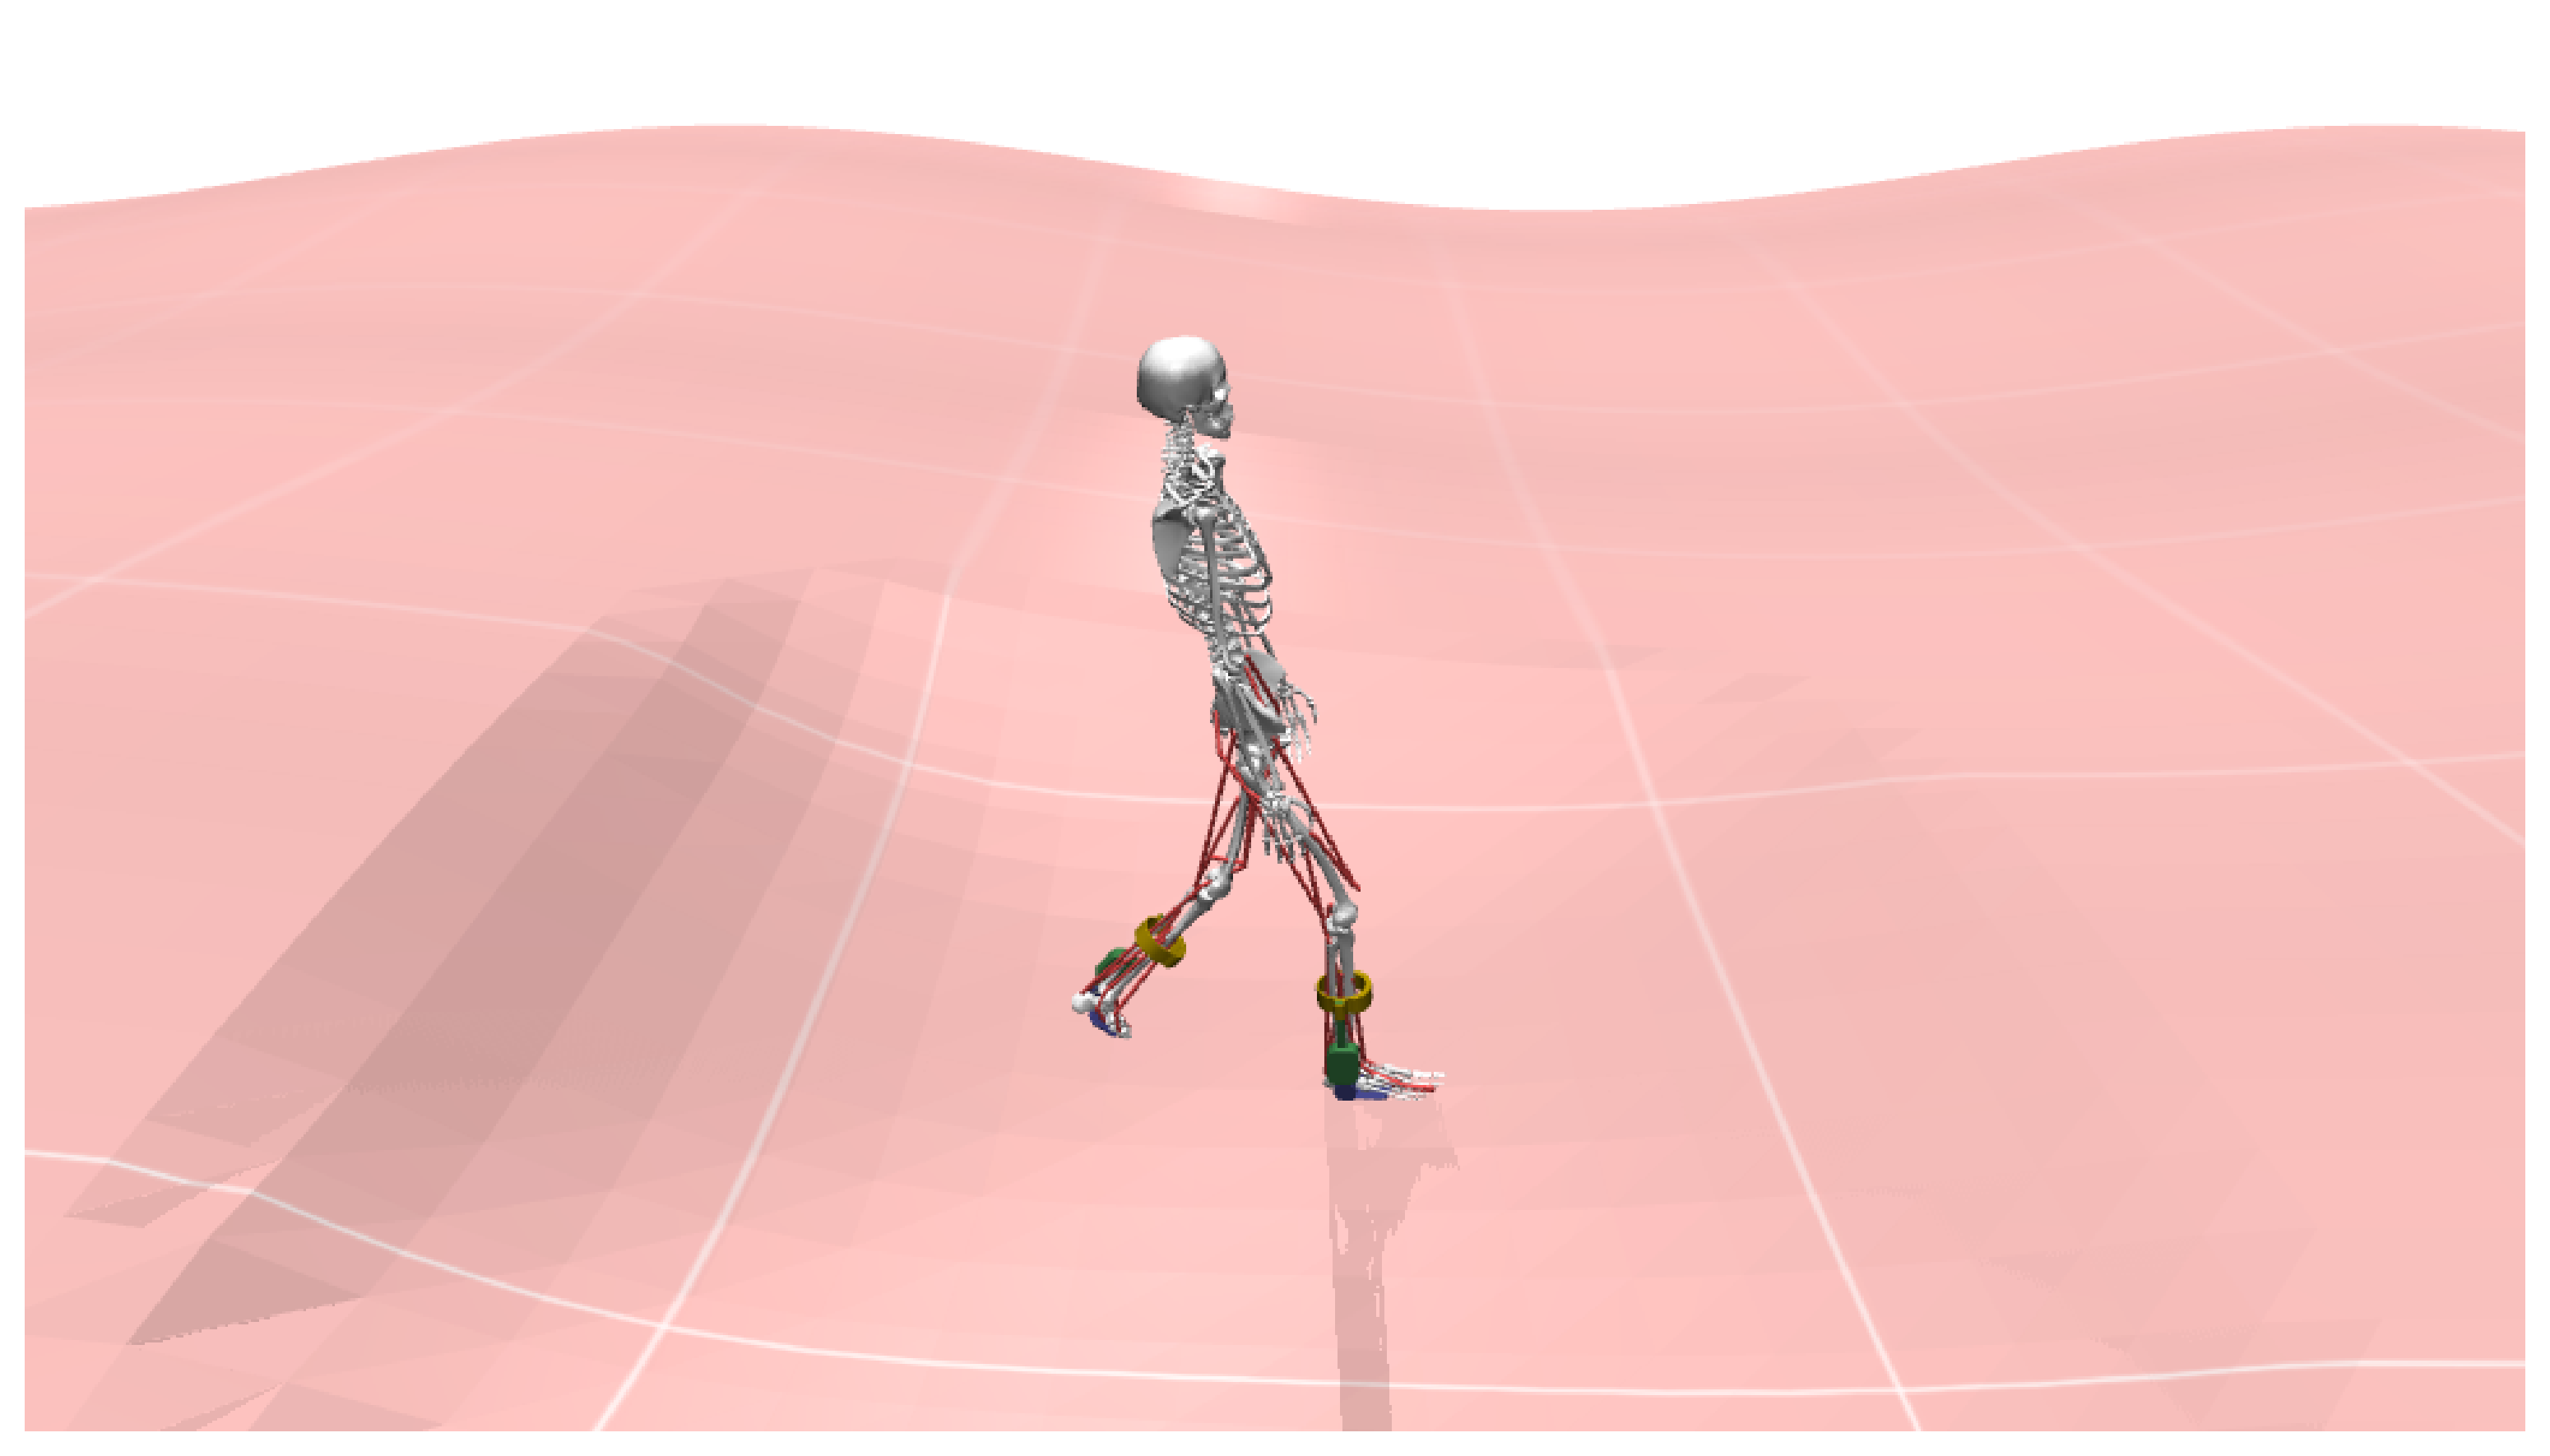

In [6]:
config.env_params.terrain_type = "harmonic_sinusoidal"
config.env_params.terrain_params = "0.1 40 0.3 60"# + " 0.0 20 0.5 100"# row amp, row period, col amp, col period...

reset_and_render(config)

Loading reference data from myoassist_rl/reference_data/short_reference_gait.npz
config.env_params.env_id='myoAssistLegImitationExo-v0'
=================environment seed: 1234=====================
=================environment model_path: models/22muscle_2D/myoLeg22_2D_TUTORIAL.xml=====================
===============================PARAMETERS=============================
self._reward_keys_and_weights=ImitationTrainSessionConfig.EnvParams.RewardWeights(forward_reward=0.2, muscle_activation_penalty=0.1, muscle_activation_diff_penalty=0.1, footstep_delta_time=0.0, average_velocity_per_step=0.0, muscle_activation_penalty_per_step=0.0, joint_constraint_force_penalty=0.0, foot_force_penalty=0.5, qpos_imitation_rewards={'pelvis_ty': 0.4, 'pelvis_tilt': 0.4, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'knee_angle_l': 0.2, 'knee_angle_r': 0.2, 'ankle_angle_l': 0.2, 'ankle_angle_r': 0.2}, qvel_imitation_rewards={'pelvis_ty': 0.4, 'pelvis_tilt': 0.4, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'k

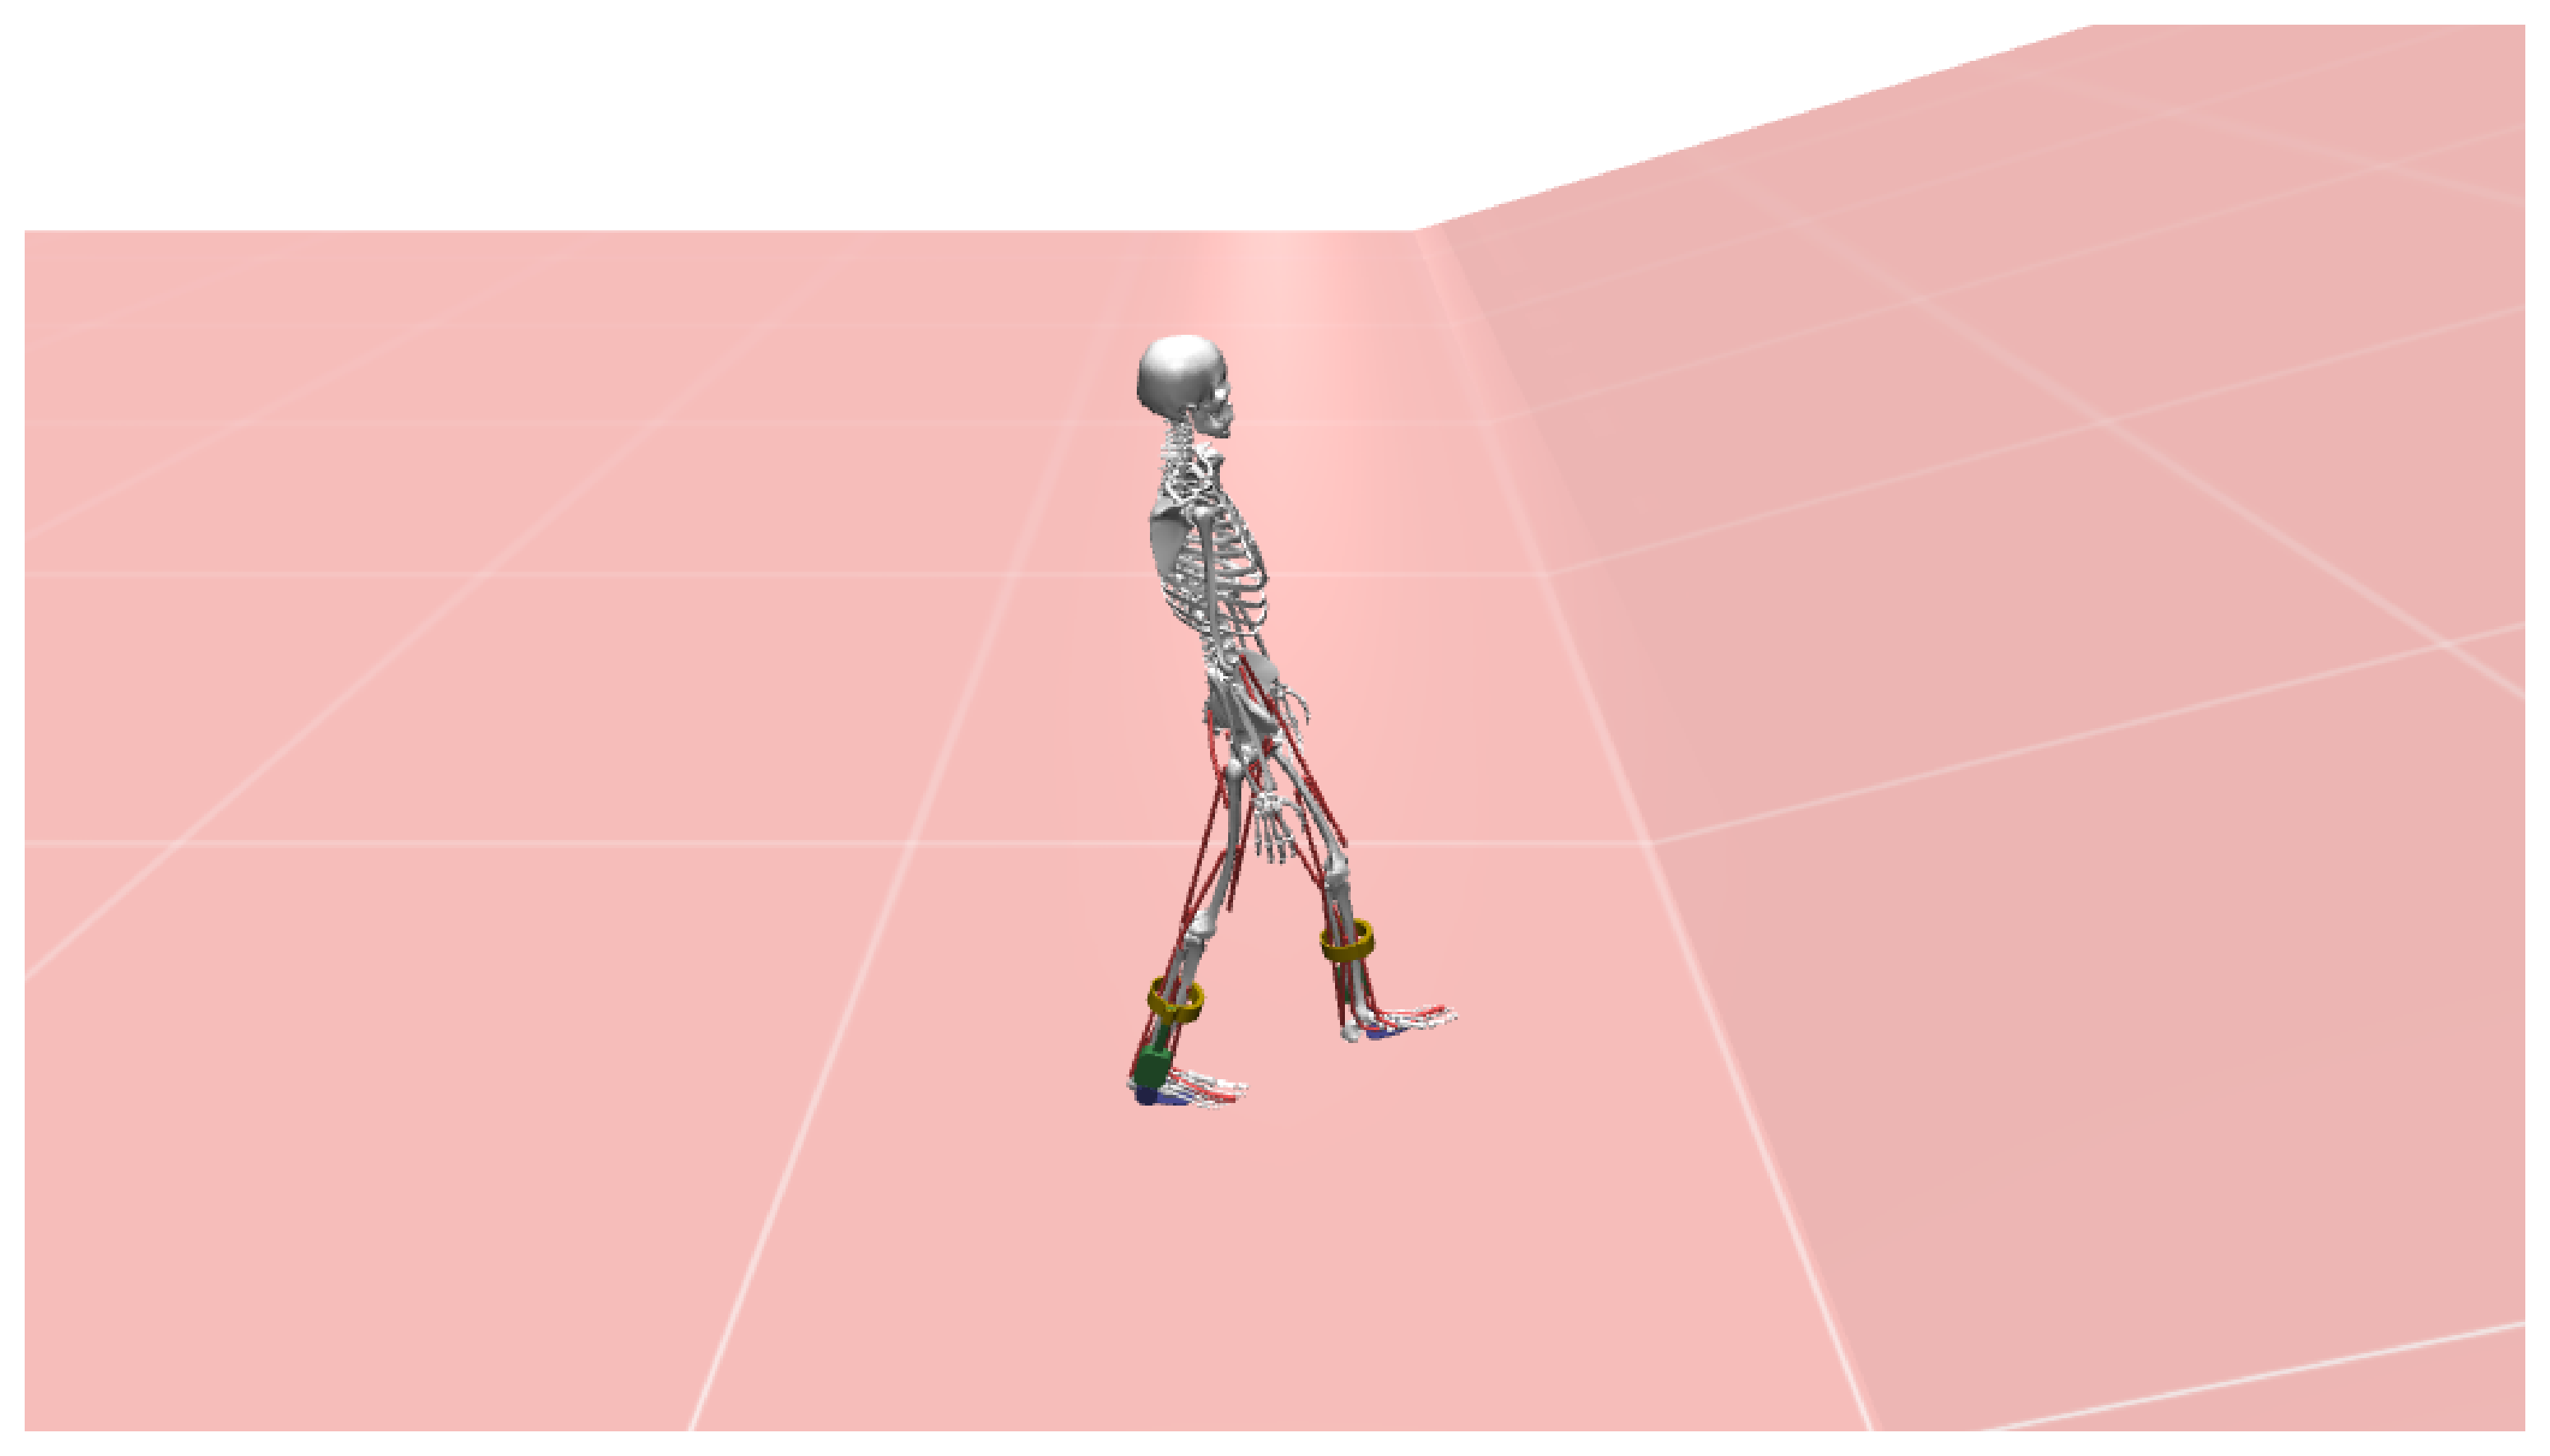

In [7]:
config.env_params.terrain_type = "slope"
config.env_params.terrain_params = "0.3"# + " 0.0 20 0.5 100"# row amp, row period, col amp, col period...

reset_and_render(config)

Loading reference data from myoassist_rl/reference_data/short_reference_gait.npz
config.env_params.env_id='myoAssistLegImitationExo-v0'
=================environment seed: 1234=====================
=================environment model_path: models/22muscle_2D/myoLeg22_2D_TUTORIAL.xml=====================
===============================PARAMETERS=============================
self._reward_keys_and_weights=ImitationTrainSessionConfig.EnvParams.RewardWeights(forward_reward=0.2, muscle_activation_penalty=0.1, muscle_activation_diff_penalty=0.1, footstep_delta_time=0.0, average_velocity_per_step=0.0, muscle_activation_penalty_per_step=0.0, joint_constraint_force_penalty=0.0, foot_force_penalty=0.5, qpos_imitation_rewards={'pelvis_ty': 0.4, 'pelvis_tilt': 0.4, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'knee_angle_l': 0.2, 'knee_angle_r': 0.2, 'ankle_angle_l': 0.2, 'ankle_angle_r': 0.2}, qvel_imitation_rewards={'pelvis_ty': 0.4, 'pelvis_tilt': 0.4, 'hip_flexion_l': 0.2, 'hip_flexion_r': 0.2, 'k

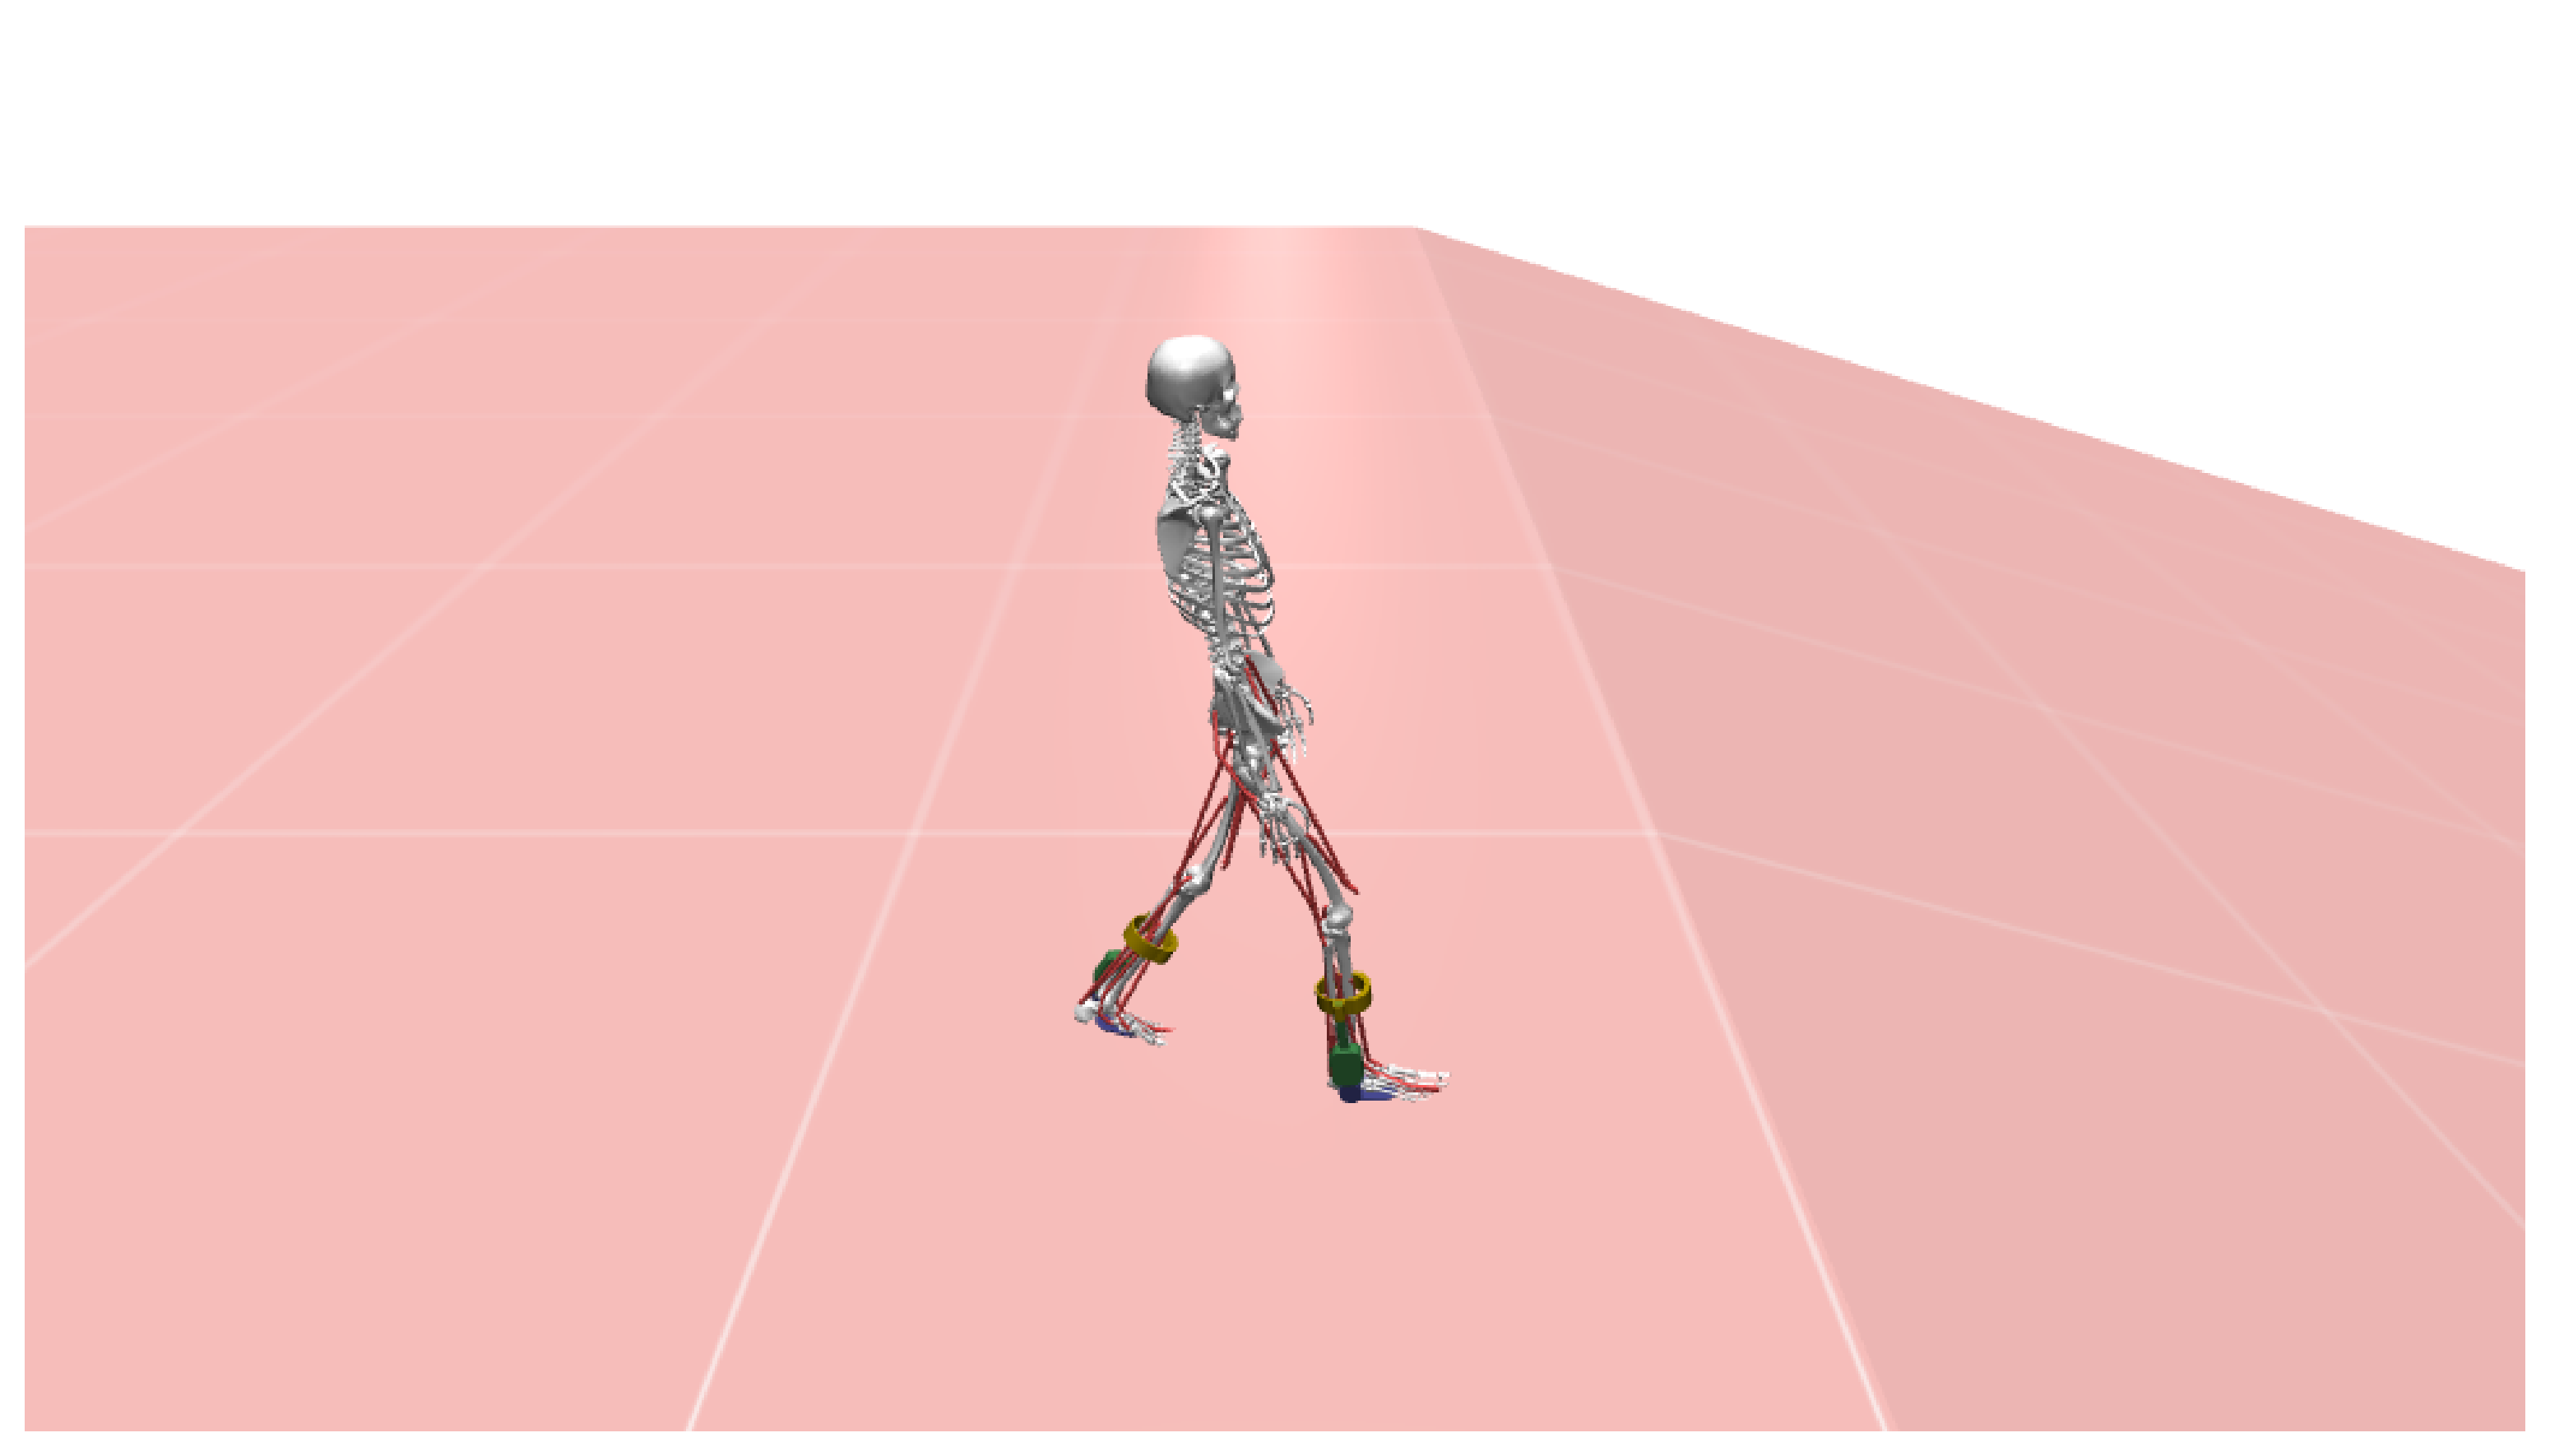

In [8]:
config.env_params.terrain_type = "slope"
config.env_params.terrain_params = "-0.3"# + " 0.0 20 0.5 100"# row amp, row period, col amp, col period...

reset_and_render(config)